<a href="https://colab.research.google.com/github/shano2542/Machine-Learning/blob/main/SMS_Spam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

import string
from nltk.corpus import stopwords
from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


In [75]:
df = pd.read_csv('/content/drive/My Drive/datasets/spam.csv', encoding='latin-1')


In [76]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [77]:
df.dropna(how="any", inplace=True, axis=1)
df.columns = ['label', 'message']

In [78]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [79]:
df.columns

Index(['label', 'message'], dtype='object')

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [81]:
df.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [82]:
df.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [83]:
df['label_num'] = df['label'].apply(lambda x: 0 if x == 'ham' else 1)
df.head()

,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [84]:
df['message_len'] = df.message.apply(len)
df.head()

,label,message,label_num,message_len
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


Text(0.5, 0, 'Message Length')

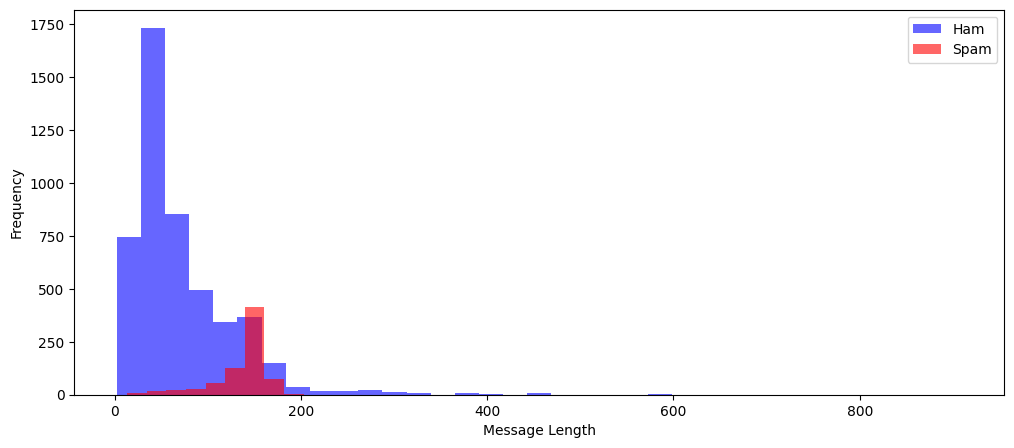

In [85]:
plt.figure(figsize=(12, 5))

df[df.label=='ham'].message_len.plot(bins=35, kind='hist', color='blue', label='Ham', alpha=0.6)
df[df.label=='spam'].message_len.plot(kind='hist', color='red', label='Spam', alpha=0.6)
plt.legend()
plt.xlabel('Message Length')

In [86]:
df[df.label=='ham'].describe()

,label_num,message_len
count,4825.0,4825.000000
mean,0.0,71.023627
std,0.0,58.016023
min,0.0,2.000000
25%,0.0,33.000000
50%,0.0,52.000000
75%,0.0,92.000000
max,0.0,910.000000


In [87]:
df[df.label=='spam'].describe()

,label_num,message_len
count,747.0,747.000000
mean,1.0,138.866131
std,0.0,29.183082
min,1.0,13.000000
25%,1.0,132.500000
50%,1.0,149.000000
75%,1.0,157.000000
max,1.0,224.000000


In [88]:
df[df.message_len==13].message.iloc[0]

'hanks lotsly!'

In [89]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [90]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    STOPWORDS = stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure']

    #punctuation checking
    nopunc = [char for char in mess if char not in string.punctuation]

    nopunc = ''.join(nopunc)

    # Removing Stopwords
    return ' '.join([word for word in nopunc.split() if word.lower() not in STOPWORDS])

In [91]:
# prompt: now clean the message

df['cleaned_message'] = df.message.apply(text_process)
df.head()


,label,message,label_num,message_len,cleaned_message
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,Go jurong point crazy Available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,0,29,Ok lar Joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,Free entry wkly comp win FA Cup final tkts 21s...
3,ham,U dun say so early hor... U c already then say...,0,49,dun say early hor c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,Nah think goes usf lives around though


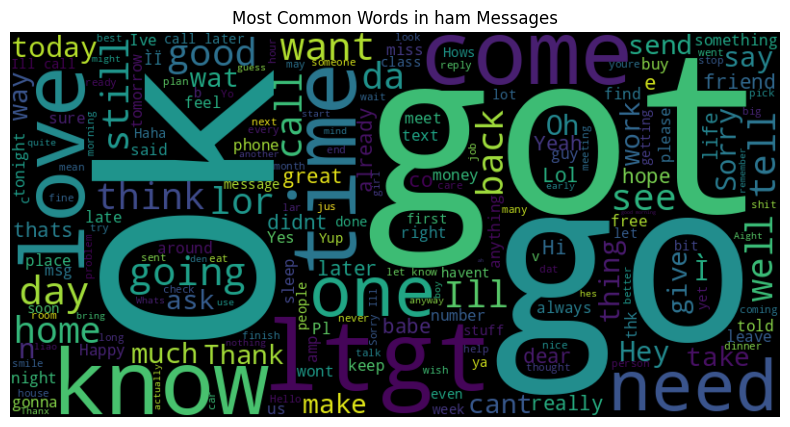

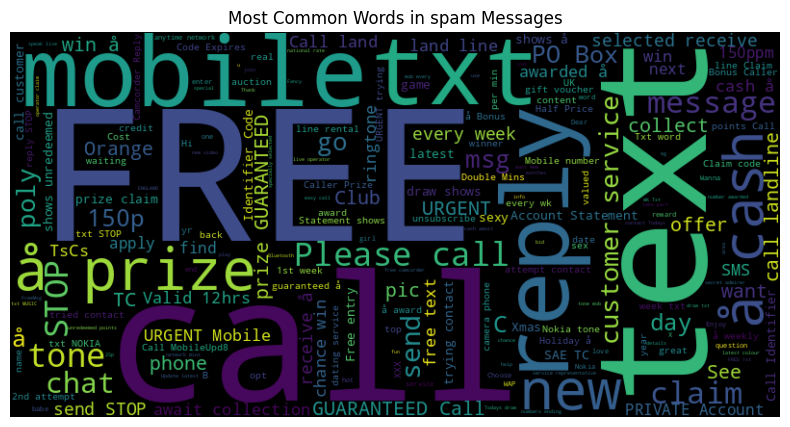

In [92]:
# @title Most Common Words by Spam/Ham

import matplotlib.pyplot as plt
from wordcloud import WordCloud
for label in df['label'].unique():
    spam_words = ' '.join(list(df[df['label'] == label]['cleaned_message']))
    wordcloud = WordCloud(width=800, height=400).generate(spam_words)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Most Common Words in {label} Messages')
    plt.show()

In [93]:
words = df[df.label=='ham'].cleaned_message.apply(lambda x: [word.lower() for word in x.split()])
ham_words = Counter()

for msg in words:
  ham_words.update(msg)

print(ham_words.most_common(80))

[('get', 303), ('ltgt', 276), ('ok', 272), ('go', 247), ('ill', 236), ('know', 232), ('got', 231), ('like', 229), ('call', 229), ('come', 224), ('good', 222), ('time', 189), ('day', 187), ('love', 185), ('going', 167), ('want', 163), ('one', 162), ('home', 160), ('lor', 160), ('need', 156), ('sorry', 153), ('still', 146), ('see', 137), ('n', 134), ('later', 134), ('da', 131), ('r', 131), ('back', 129), ('think', 128), ('well', 126), ('today', 125), ('send', 123), ('tell', 121), ('cant', 118), ('ì', 117), ('hi', 117), ('take', 112), ('much', 112), ('oh', 111), ('night', 107), ('hey', 106), ('happy', 105), ('great', 100), ('way', 100), ('hope', 99), ('pls', 98), ('work', 96), ('wat', 95), ('thats', 94), ('dear', 94), ('give', 92), ('say', 91), ('already', 89), ('right', 89), ('make', 88), ('ask', 88), ('said', 86), ('really', 85), ('yeah', 85), ('amp', 82), ('tomorrow', 80), ('phone', 80), ('didnt', 79), ('e', 78), ('morning', 77), ('please', 76), ('cos', 76), ('life', 74), ('ive', 73), 

In [94]:
words = df[df.label=='spam'].cleaned_message.apply(lambda x: [word.lower() for word in x.split()])
spam_words = Counter()

for msg in words:
  spam_words.update(msg)

print(spam_words.most_common(80))

[('call', 347), ('free', 216), ('txt', 150), ('mobile', 123), ('text', 120), ('claim', 113), ('stop', 113), ('reply', 101), ('prize', 92), ('get', 83), ('new', 69), ('send', 67), ('nokia', 65), ('urgent', 63), ('cash', 62), ('win', 60), ('contact', 56), ('service', 55), ('please', 52), ('guaranteed', 50), ('customer', 49), ('16', 49), ('week', 49), ('tone', 48), ('per', 46), ('phone', 45), ('18', 43), ('chat', 42), ('awarded', 38), ('draw', 38), ('latest', 36), ('å£1000', 35), ('line', 35), ('150ppm', 34), ('mins', 34), ('receive', 33), ('camera', 33), ('1', 33), ('every', 33), ('message', 32), ('holiday', 32), ('landline', 32), ('shows', 31), ('å£2000', 31), ('go', 31), ('box', 30), ('number', 30), ('apply', 29), ('code', 29), ('live', 29), ('want', 29), ('video', 29), ('po', 29), ('tcs', 29), ('award', 28), ('å£150', 27), ('msg', 27), ('chance', 27), ('entry', 26), ('ringtone', 26), ('orange', 26), ('1st', 26), ('collection', 26), ('network', 25), ('selected', 25), ('know', 25), ('50

In [95]:
X = df.cleaned_message
y = df.label_num

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [96]:
vectorizer = CountVectorizer()

train_dtm = vectorizer.fit_transform(X_train)

print(type(train_dtm), train_dtm.shape)

test_dtm = vectorizer.transform(X_test)

print(type(test_dtm), test_dtm.shape)

<class 'scipy.sparse._csr.csr_matrix'> (4179, 7996)
<class 'scipy.sparse._csr.csr_matrix'> (1393, 7996)


In [97]:
tfidf_transformer = TfidfTransformer()
tfidf_transformer.fit(train_dtm)
tfidf_transformer.transform(train_dtm)

<4179x7996 sparse matrix of type '<class 'numpy.float64'>'
	with 34796 stored elements in Compressed Sparse Row format>

In [98]:
NB_model = MultinomialNB()
%time NB_model.fit(train_dtm, y_train)

y_pred = NB_model.predict(test_dtm)

print("=======Accuracy Score===========")
print(metrics.accuracy_score(y_test, y_pred))

print("=======Confision Matrix===========")
print(metrics.confusion_matrix(y_test, y_pred))

print("=======ROC AUC Score===========")
print(metrics.roc_auc_score(y_test, y_pred))

CPU times: user 8.89 ms, sys: 0 ns, total: 8.89 ms
Wall time: 9.49 ms
=======Accuracy Score===========
0.9827709978463748
=======Confision Matrix===========
[[1205    8]
 [  16  164]]
=======ROC AUC Score===========
0.9522579463222496


In [99]:
pipe = Pipeline([('bow', CountVectorizer()),
                 ('tfid', TfidfTransformer()),
                 ('model', MultinomialNB())])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print("=======Accuracy Score===========")
print(metrics.accuracy_score(y_test, y_pred))

print("=======Confision Matrix===========")
print(metrics.confusion_matrix(y_test, y_pred))

=======Accuracy Score===========
0.9669777458722182
=======Confision Matrix===========
[[1213    0]
 [  46  134]]


In [100]:
logreg = LogisticRegression(solver='liblinear')
logreg.fit(train_dtm, y_train)

y_pred = logreg.predict(test_dtm)


print("=======Accuracy Score===========")
print(metrics.accuracy_score(y_test, y_pred))


print("=======Confision Matrix===========")
print(metrics.confusion_matrix(y_test, y_pred))

print("=======ROC AUC Score===========")
print(metrics.roc_auc_score(y_test, y_pred))

=======Accuracy Score===========
0.9842067480258435
=======Confision Matrix===========
[[1213    0]
 [  22  158]]
=======ROC AUC Score===========
0.9388888888888889


In [101]:
svm_model = SVC()
svm_model.fit(train_dtm, y_train)

y_pred = svm_model.predict(test_dtm)

print("=======Accuracy Score===========")
print(metrics.accuracy_score(y_test, y_pred))


print("=======Confision Matrix===========")
print(metrics.confusion_matrix(y_test, y_pred))

print("=======ROC AUC Score===========")
print(metrics.roc_auc_score(y_test, y_pred))

=======Accuracy Score===========
0.9813352476669059
=======Confision Matrix===========
[[1213    0]
 [  26  154]]
=======ROC AUC Score===========
0.9277777777777778
